# Importing required Libraries

# New Section

In [ ]:
import os
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import missingno as msno
import numpy as np

**Data** **Preprocessing**

In [ ]:
import pandas as pd

# Now you can use pd to read the CSV files
df = pd.read_csv('/content/Set03.csv')
df2 = pd.read_csv('/content/kidney_disease.csv')


In [ ]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [ ]:
df2.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
names = []
for col in df.columns:
  names.append(col)
names

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class']

In [ ]:
df2.info()
for col in df2.columns:
  print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
import pandas as pd

# Create a DataFrame with the desired number of columns
df2 = pd.DataFrame(columns=names)


In [ ]:
df2.columns = names
df2

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class


In [ ]:
df2['Class'] = df2['Class'].map({'ckd': 1, 'notckd': 0})


In [ ]:
df2

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class


In [ ]:
import pandas as pd

# Assuming df and df2 are correctly defined
df_merged = pd.concat([df, df2], ignore_index=True)


In [ ]:
df_merged

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [ ]:

ckd_df = pd.read_csv('/content/kidney_merged.csv')


In [ ]:
kd_df = pd.concat([ckd_df]*2)
kd_df

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1.0
1,1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1.0
2,2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1.0
3,3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1.0
4,4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,553,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,0.0
554,554,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,0.0
555,555,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,0.0
556,556,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,0.0


**Data** **Visualization**

In [ ]:
kd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 557
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1116 non-null   int64  
 1   Age                      1098 non-null   float64
 2   Blood Pressure           1092 non-null   float64
 3   Specific Gravity         1022 non-null   float64
 4   Albumin                  1024 non-null   float64
 5   Sugar                    1018 non-null   float64
 6   Red Blood Cells          812 non-null    object 
 7   Pus Cell                 986 non-null    object 
 8   Pus Cell clumps          1108 non-null   object 
 9   Bacteria                 1108 non-null   object 
 10  Blood Glucose Random     1028 non-null   float64
 11  Blood Urea               1078 non-null   float64
 12  Serum Creatinine         1082 non-null   float64
 13  Sodium                   942 non-null    float64
 14  Potassium                940 n

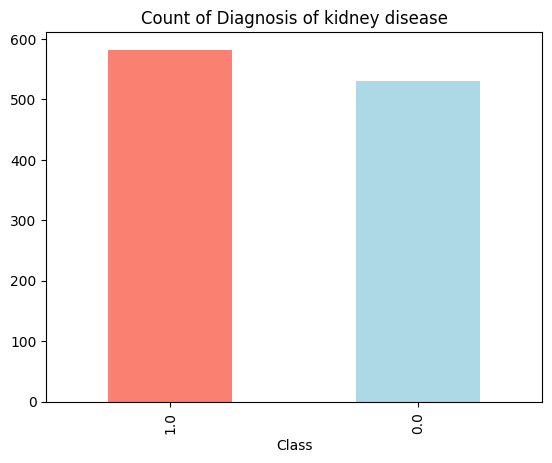

In [ ]:
kd_df['Class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");

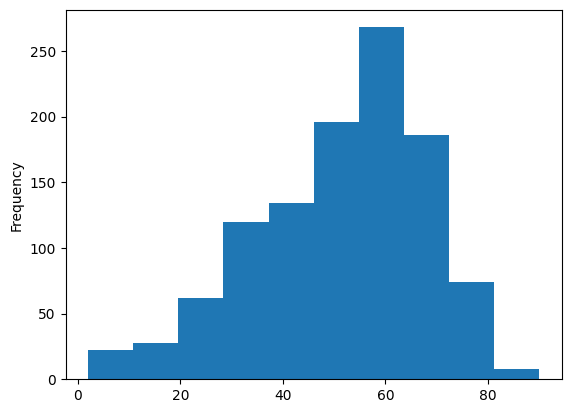

In [ ]:
kd_df['Age'].plot(kind='hist');

In [ ]:
kd_df['Class'].value_counts()

Class
1.0    582
0.0    530
Name: count, dtype: int64

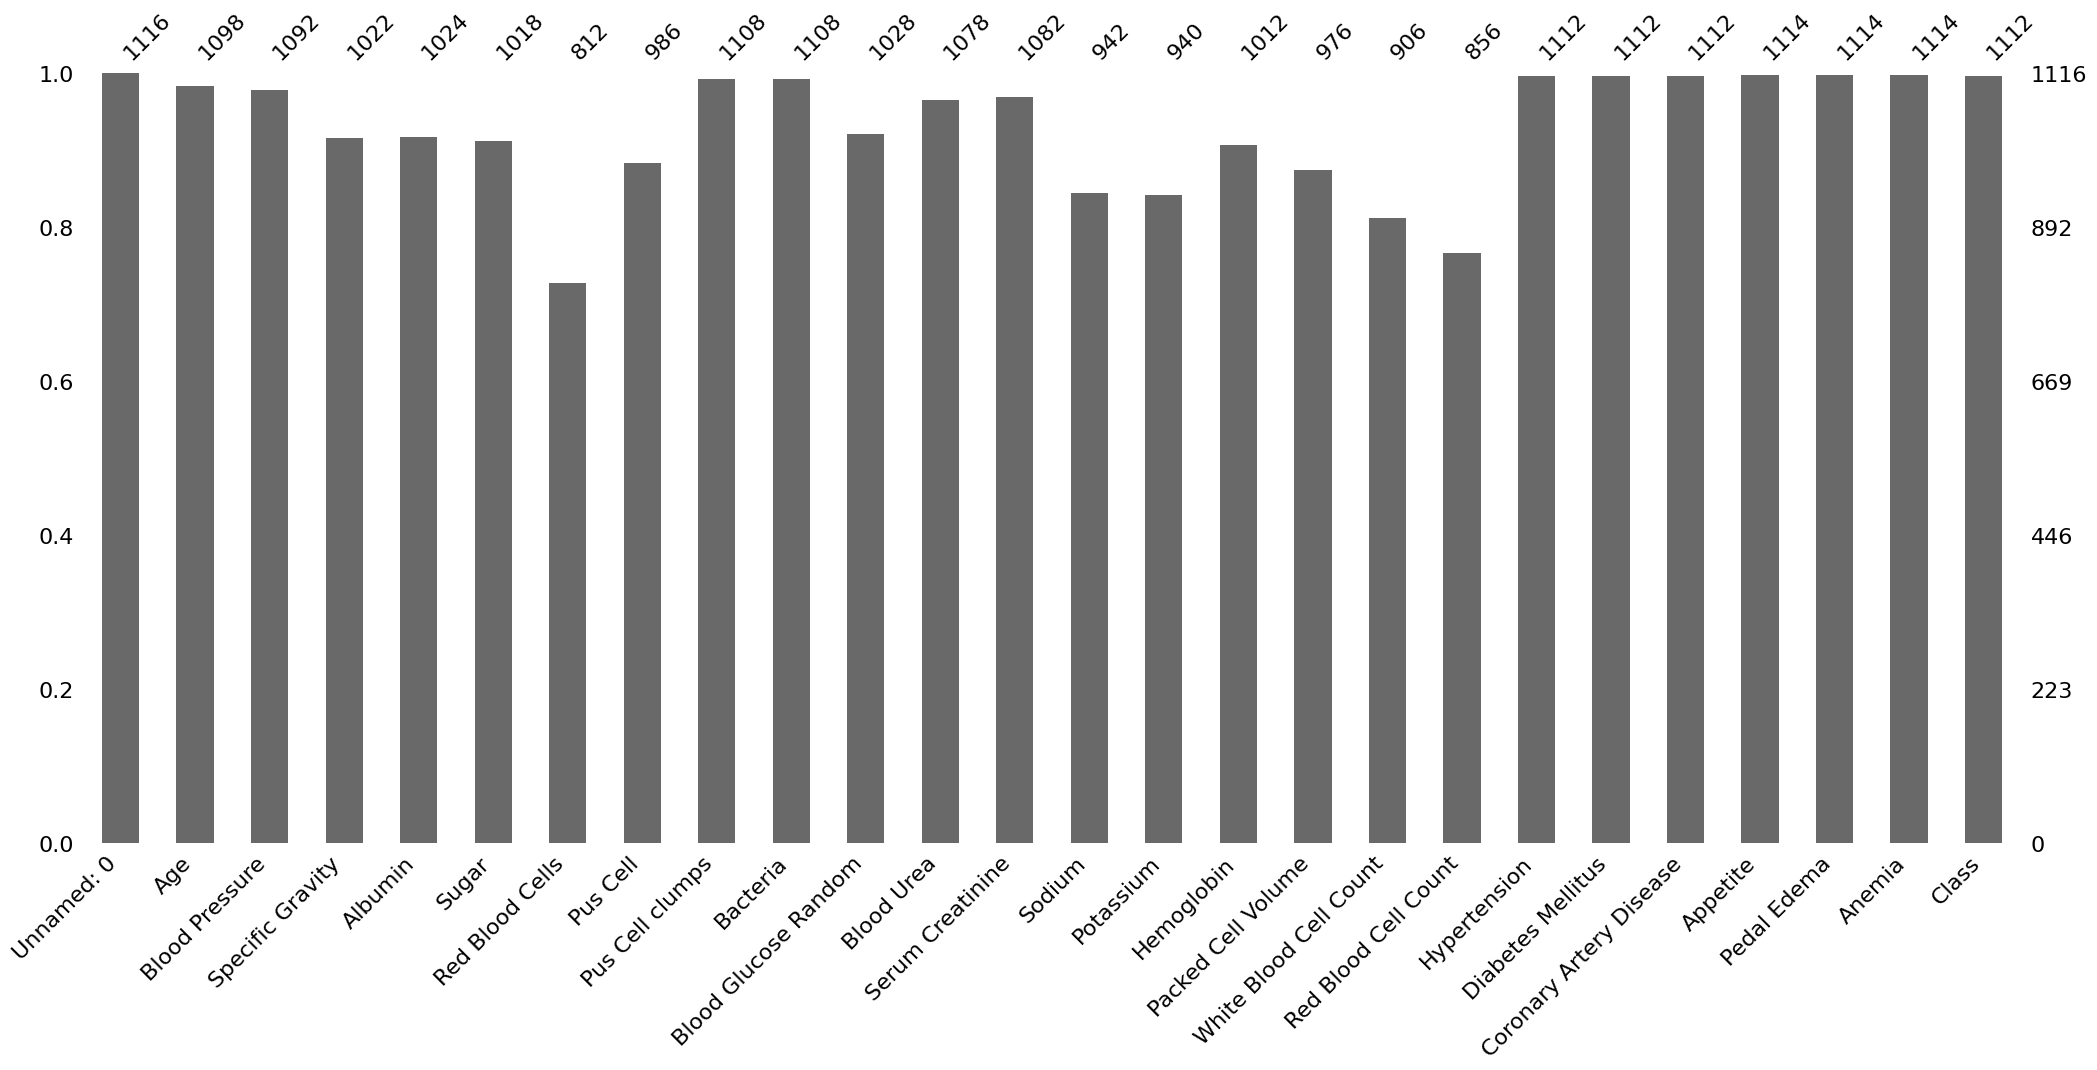

In [ ]:
p = msno.bar(kd_df)

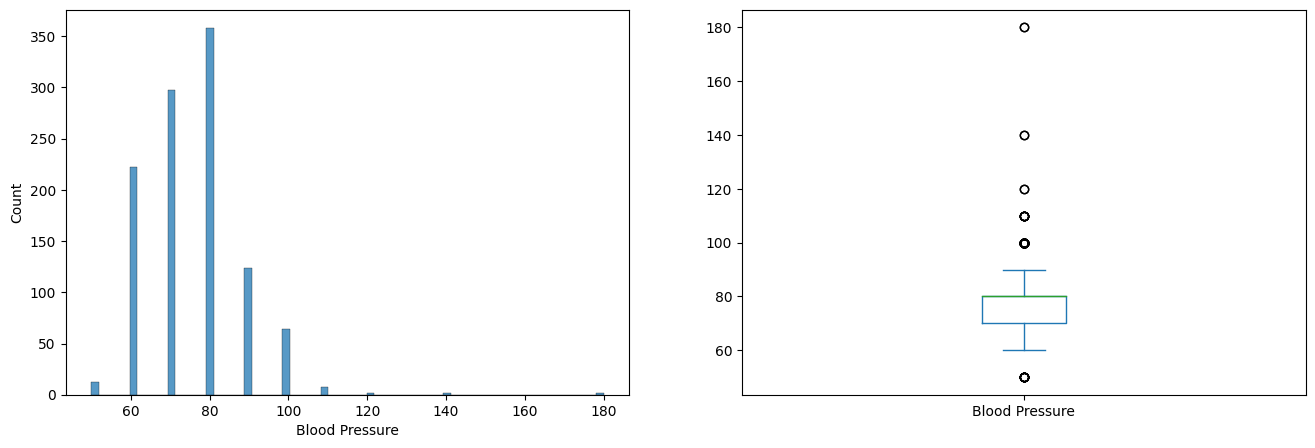

In [ ]:
plt.subplot(121), sns.histplot(kd_df['Blood Pressure'])
plt.subplot(122), kd_df['Blood Pressure'].plot.box(figsize=(16,5))
plt.show()

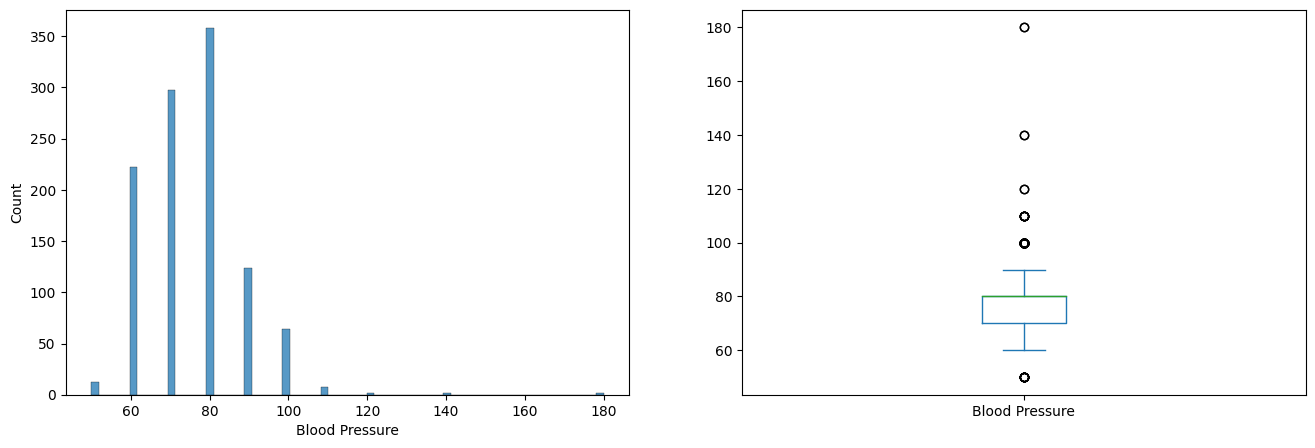

In [ ]:
plt.subplot(121), sns.histplot(kd_df['Blood Pressure'])
plt.subplot(122), kd_df['Blood Pressure'].plot.box(figsize=(16,5))
plt.show()

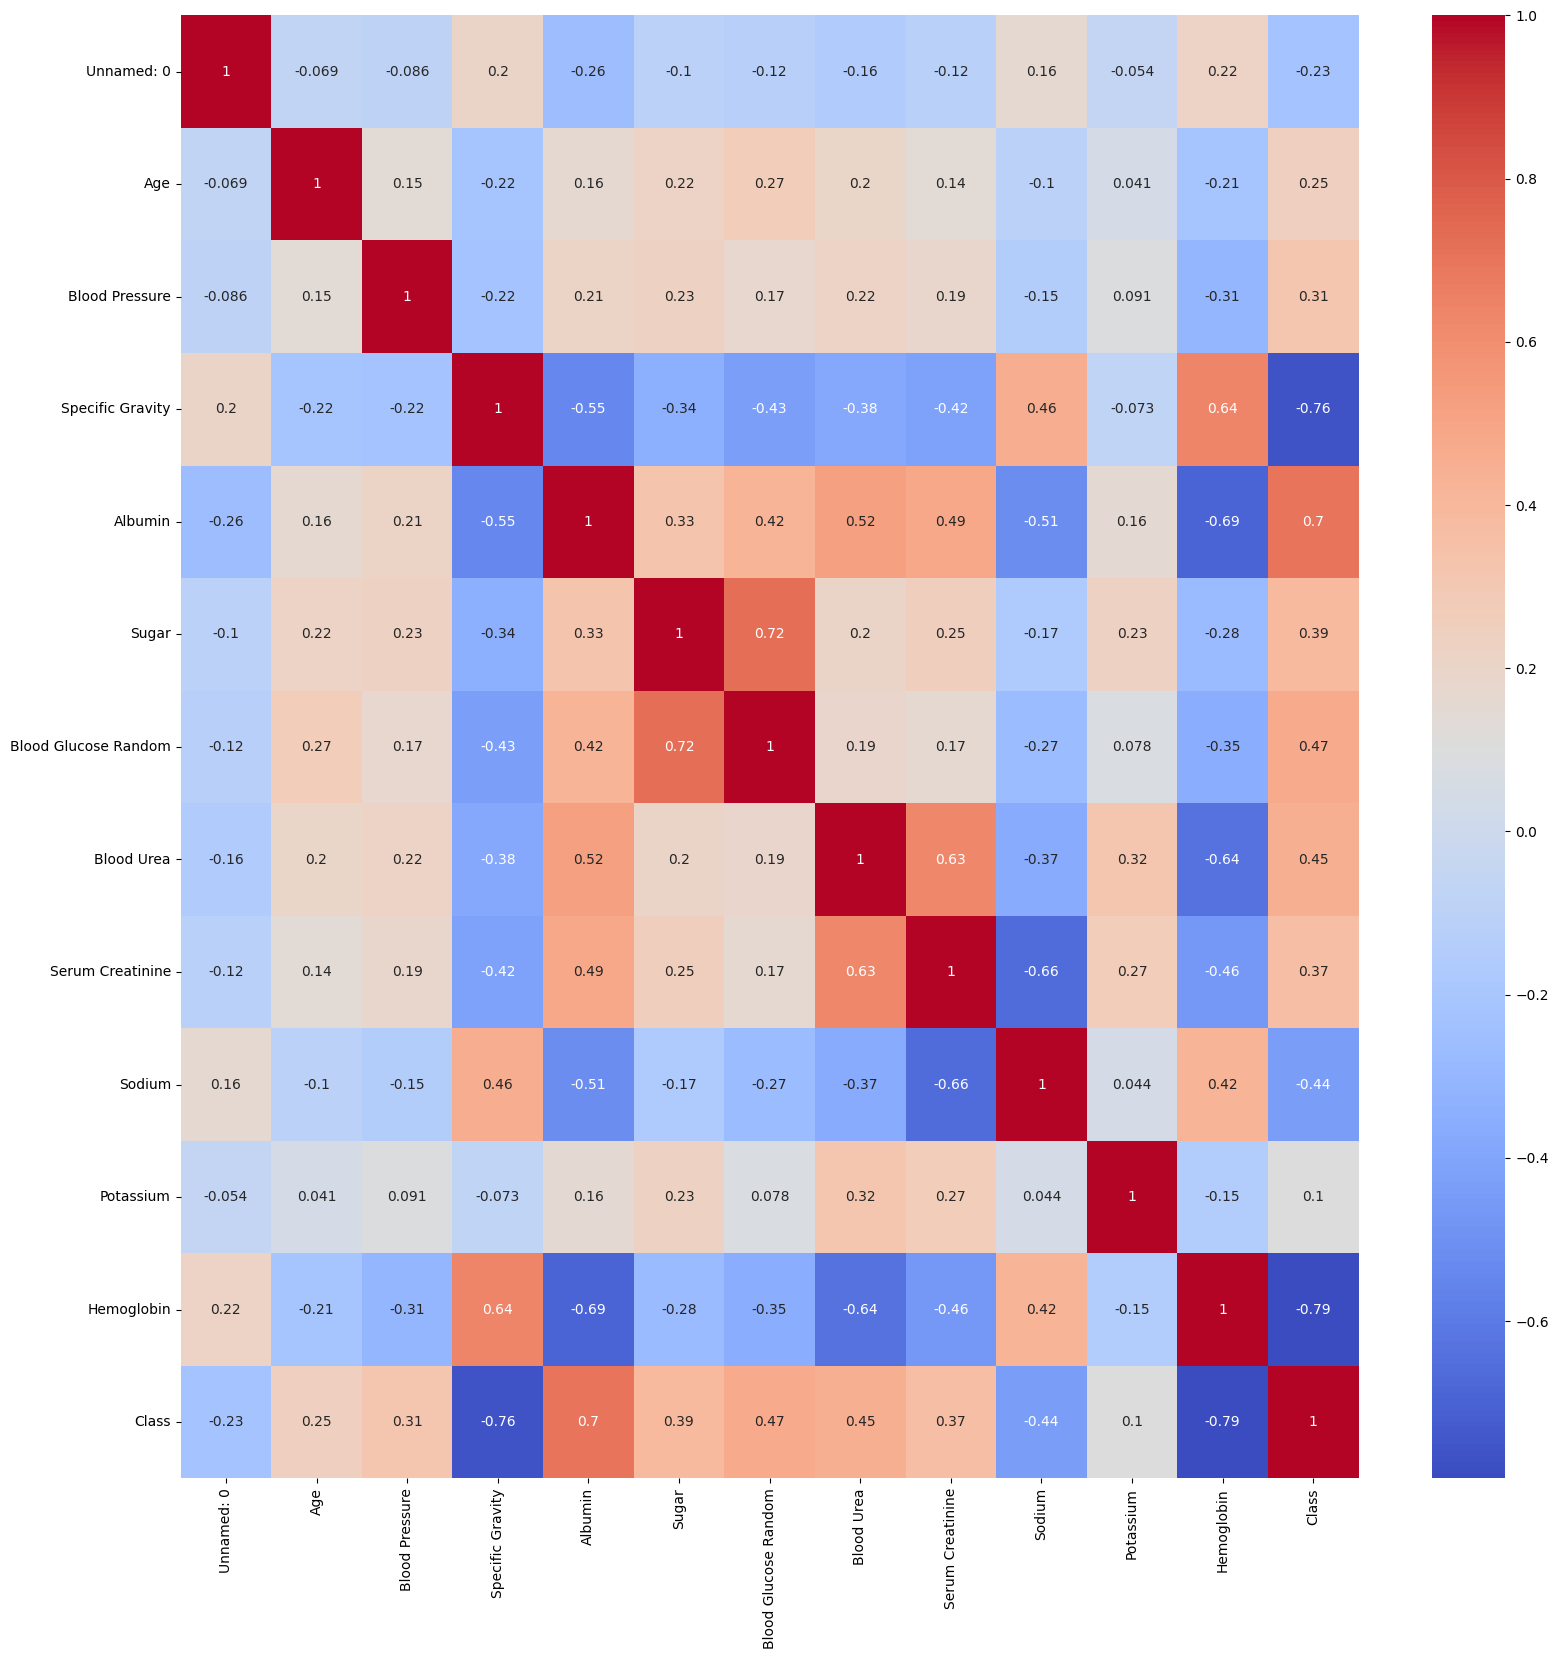

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming kd_df is your DataFrame
numeric_cols = kd_df.select_dtypes(include='number')  # Select only numeric columns
plt.figure(figsize=(19, 19))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()


**EXPLORING** **DATA** **ANALYSIS**


In [ ]:
data = kd_df

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 557
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1116 non-null   int64  
 1   Age                      1098 non-null   float64
 2   Blood Pressure           1092 non-null   float64
 3   Specific Gravity         1022 non-null   float64
 4   Albumin                  1024 non-null   float64
 5   Sugar                    1018 non-null   float64
 6   Red Blood Cells          812 non-null    object 
 7   Pus Cell                 986 non-null    object 
 8   Pus Cell clumps          1108 non-null   object 
 9   Bacteria                 1108 non-null   object 
 10  Blood Glucose Random     1028 non-null   float64
 11  Blood Urea               1078 non-null   float64
 12  Serum Creatinine         1082 non-null   float64
 13  Sodium                   942 non-null    float64
 14  Potassium                940 n


- Check for null values
- Scale the values for accurate prediction
- If exists, Drop rows with high number of corrup data

In [ ]:
data.shape

(1116, 26)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1.0
1,1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1.0
2,2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1.0
3,3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1.0
4,4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1.0


**CONVERTING TEXT ATTRIBUTE TO** **NUMERICAL** **ATTRIBUTES**

In [ ]:
data['Hypertension'] = data['Hypertension'].map({'yes':1,'no':0})
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].map({'yes':1,'no':0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].map({'yes':1,'no':0})
data['Appetite'] = data['Appetite'].map({'good':1,'poor':0})
data['Anemia'] = data['Anemia'].map({'yes':1,'no':0})
data['Pedal Edema'] = data['Pedal Edema'].map({'yes':1,'no':0})
data['Bacteria'] = data['Bacteria'].map({'present':1,'notpresent':0})
data['Pus Cell clumps'] = data['Pus Cell clumps'].map({'present':1,'notpresent':0})
data['Pus Cell'] = data['Pus Cell'].map({'abnormal':1,'normal':0})
data['Red Blood Cells'] = data['Red Blood Cells'].map({'abnormal':1,'normal':0})

In [ ]:
data

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,2,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,4,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,553,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
554,554,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
555,555,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
556,556,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**DEALING** **WITH** **NULL** **VALUES**

In [ ]:
data.isnull().sum()

Unnamed: 0                   0
Age                         18
Blood Pressure              24
Specific Gravity            94
Albumin                     92
Sugar                       98
Red Blood Cells            304
Pus Cell                   130
Pus Cell clumps              8
Bacteria                     8
Blood Glucose Random        88
Blood Urea                  38
Serum Creatinine            34
Sodium                     174
Potassium                  176
Hemoglobin                 104
Packed Cell Volume         140
White Blood Cell Count     210
Red Blood Cell Count       260
Hypertension                 4
Diabetes Mellitus           16
Coronary Artery Disease      8
Appetite                     2
Pedal Edema                  2
Anemia                       2
Class                        4
dtype: int64

**Replcaing column with numerical values with their mean value. Binary classes are kept as null text**

In [ ]:
#age
mean_age = data['Age'].mean()
mean_age
data['Age'].fillna(value=mean_age, inplace=True)
#bp
mean_bp  = data['Blood Pressure'].mean()
mean_bp
data['Blood Pressure'].fillna(value=mean_bp, inplace=True)
#sg
mean_sg = data['Specific Gravity'].mean()
mean_sg
data['Specific Gravity'].fillna(value=mean_sg, inplace=True)
#albumin
mean_albumin = data['Albumin'].mean()
mean_albumin
data['Albumin'].fillna(value=mean_albumin, inplace=True)
#sugar
mean_sugar = data['Sugar'].mean()
mean_sugar
data['Sugar'].fillna(value=mean_sugar, inplace=True)
#bgr
mean_bgr =  data['Blood Glucose Random'].mean()
mean_bgr
data['Blood Glucose Random'].fillna(value=mean_bgr, inplace=True)
#bu
mean_bu =  data['Blood Urea'].mean()
mean_bu
data['Blood Urea'].fillna(value=mean_bu, inplace=True)
#sc
mean_sc =  data['Serum Creatinine'].mean()
mean_sc
data['Serum Creatinine'].fillna(value=mean_sc, inplace=True)
#sodium
mean_sodium =  data['Sodium'].mean()
mean_sodium
data['Sodium'].fillna(value=mean_sodium, inplace=True)
#potasium
mean_potassium =  data['Potassium'].mean()
mean_potassium
data['Potassium'].fillna(value=mean_potassium, inplace=True)
#hemoglobin
mean_hemoglobin =  data['Hemoglobin'].mean()
mean_hemoglobin
data['Hemoglobin'].fillna(value=mean_hemoglobin, inplace=True)

In [ ]:
import pandas as pd

# Assuming you have some data stored in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/kidney_clean.csv')

# Now you can check for null values in the DataFrame
null_values = data.isnull().sum()
print(null_values)


Unnamed: 0                 0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64


In [ ]:
data.isnull().sum()

Unnamed: 0                 0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

**DATA** **SPLITING**


```

```



In [ ]:
data = pd.read_csv("kidney_clean.csv")

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0.0,0,1,1,1.0
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0.0,0,0,1,1.0
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0.0,0,1,0,1.0
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1.0,0,1,0,1.0
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1.0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47,6700,4.9,0,0,0.0,1,0,0,0.0
678,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54,7800,6.2,0,0,0.0,1,0,0,0.0
679,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49,6600,5.4,0,0,0.0,1,0,0,0.0
680,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51,7200,5.9,0,0,0.0,1,0,0,0.0


In [ ]:
X = data.iloc[:,:-1]
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and y
# X contains your features and y contains your target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


In [ ]:
X_train

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
443,44.0,70.0,1.025,0.0,0.0,0,0,0,0,92.0,...,14.0,52,7500,6.2,0,0,0.0,1,0,0
448,44.0,60.0,1.020,0.0,0.0,0,0,0,0,95.0,...,15.0,50,7700,6.3,0,0,0.0,1,0,0
211,48.0,110.0,1.015,3.0,0.0,1,0,1,0,106.0,...,8.6,26,5000,2.5,1,0,1.0,1,0,1
361,70.0,100.0,1.015,4.0,0.0,0,0,0,0,118.0,...,12.0,37,8400,8.0,1,0,0.0,1,0,0
406,52.0,80.0,1.020,0.0,0.0,0,0,0,0,125.0,...,16.5,43,4700,4.6,0,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,37.0,60.0,1.025,0.0,0.0,0,0,0,0,111.0,...,16.2,50,5500,5.7,0,0,0.0,1,0,0
90,58.0,70.0,1.020,0.0,0.0,0,0,0,0,102.0,...,15.0,40,8100,4.9,0,0,0.0,1,0,0
570,50.0,80.0,1.020,0.0,0.0,0,0,0,0,97.0,...,14.2,48,10500,5.0,0,0,0.0,1,0,0
648,73.0,80.0,1.025,0.0,0.0,0,0,0,0,118.0,...,14.8,45,9300,4.7,0,0,0.0,1,0,0


In [ ]:
X_test

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
435,43.0,80.0,1.025,0.0,0.0,0,0,0,0,130.0,...,15.9,45,7800,4.5,0,0,0.0,1,0,0
407,46.0,60.0,1.025,0.0,0.0,0,0,0,0,123.0,...,15.7,50,6300,4.8,0,0,0.0,1,0,0
88,55.0,80.0,1.020,0.0,0.0,0,0,0,0,104.0,...,17.3,52,8200,4.8,0,0,0.0,1,0,0
9,46.0,60.0,1.010,1.0,0.0,0,0,0,0,163.0,...,9.8,28,14600,3.2,1,1,0.0,1,0,0
249,30.0,80.0,1.020,0.0,0.0,0,0,0,0,89.0,...,16.7,52,10200,5.0,0,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,49.0,100.0,1.010,3.0,0.0,1,1,0,0,129.0,...,8.1,24,9600,3.5,1,1,0.0,0,1,1
660,64.0,70.0,1.020,0.0,0.0,0,0,0,0,97.0,...,13.8,49,6400,4.8,0,0,0.0,1,0,0
67,48.0,60.0,1.020,0.0,0.0,0,0,0,0,112.0,...,14.5,44,9400,6.4,0,0,0.0,1,0,0
213,56.0,90.0,1.010,4.0,1.0,0,1,1,0,176.0,...,3.1,9,5400,2.1,1,1,0.0,0,1,1


In [ ]:
y_train

443    0.0
448    0.0
211    1.0
361    1.0
406    0.0
      ... 
629    0.0
90     0.0
570    0.0
648    0.0
70     0.0
Name: Class, Length: 511, dtype: float64

In [ ]:
y_test

435    0.0
407    0.0
88     0.0
9      1.0
249    0.0
      ... 
372    1.0
660    0.0
67     0.0
213    1.0
283    0.0
Name: Class, Length: 171, dtype: float64

**MODELING**
 **IMPORTING** **CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

crossvalidation_score = []
mod = []
model = [BaggingClassifier(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(),
         DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), GaussianNB()]

for mdl in model:
    crossvalidation_score.append(cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(mdl.__class__.__name__)

model_df = pd.DataFrame(columns=['model', 'crossvalidation_score'])
model_df['model'] = mod
model_df['crossvalidation_score'] = crossvalidation_score
model_df.sort_values(by=['crossvalidation_score'], ascending=True, inplace=True)
print(model_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                        model  crossvalidation_score
1                         SVC               0.782848
6        KNeighborsClassifier               0.908053
7          LogisticRegression               0.988311
5         ExtraTreeClassifier               0.994118
0           BaggingClassifier               1.000000
2      RandomForestClassifier               1.000000
3  GradientBoostingClassifier               1.000000
4      DecisionTreeClassifier               1.000000
8                  GaussianNB               1.000000


**Using Cross Validation and applying Classifier Algorithms**


In [ ]:
crossvalidation_score=[]
mod = []
model =[BaggingClassifier(), SVC(),RandomForestClassifier(), GradientBoostingClassifier(),
        DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(),LogisticRegression(),GaussianNB(),]
for mdl in model:
    crossvalidation_score.append(cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(mdl)
model_df= pd.DataFrame(columns=['model','crossvalidation_score'])
model_df['model']= mod
model_df['crossvalidation_score']= crossvalidation_score
model_df.sort_values(by=['crossvalidation_score'], ascending=True)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,model,crossvalidation_score
1,SVC(),0.782848
6,KNeighborsClassifier(),0.908053
7,LogisticRegression(),0.988311
5,ExtraTreeClassifier(),0.996097
0,BaggingClassifier(),1.000000
2,RandomForestClassifier(),1.000000
3,GradientBoostingClassifier(),1.000000
4,DecisionTreeClassifier(),1.000000
8,GaussianNB(),1.000000


**K**-**NEIGBHOUR** **CLASSIFIER**

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Your code for model training and prediction

# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


NameError: name 'pred' is not defined

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       121
         1.0       1.00      0.72      0.84        50

    accuracy                           0.92       171
   macro avg       0.95      0.86      0.89       171
weighted avg       0.93      0.92      0.91       171

<bound method ClassifierMixin.score of KNeighborsClassifier()>


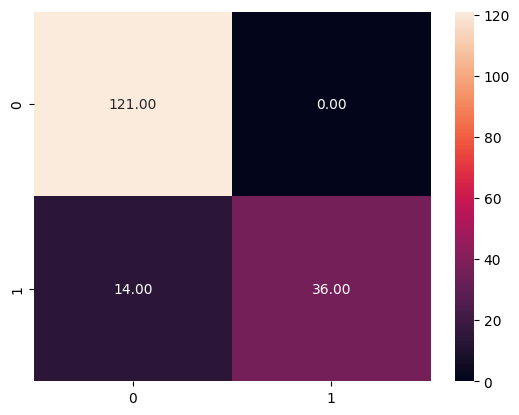

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
kmodel = KNeighborsClassifier()
kmodel.fit(X_train,y_train)
pred = kmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(kmodel.score)

**LOGISTIC** **REGRESSION**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.96      0.98        50

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

<bound method ClassifierMixin.score of LogisticRegression()>


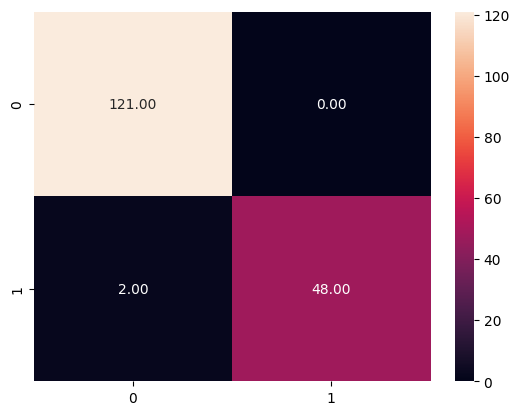

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)
pred = lmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(lmodel.score)

**DECISION  TREE**


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

<bound method ClassifierMixin.score of DecisionTreeClassifier()>


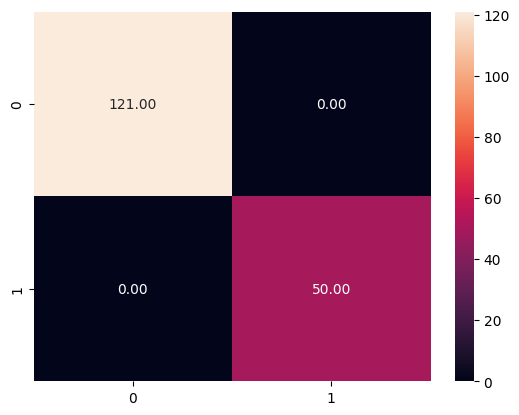

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)
pred = dmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(dmodel.score)

**GRADIANT BOOSTER** **CLASSIFIER**


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

<bound method ClassifierMixin.score of GradientBoostingClassifier()>


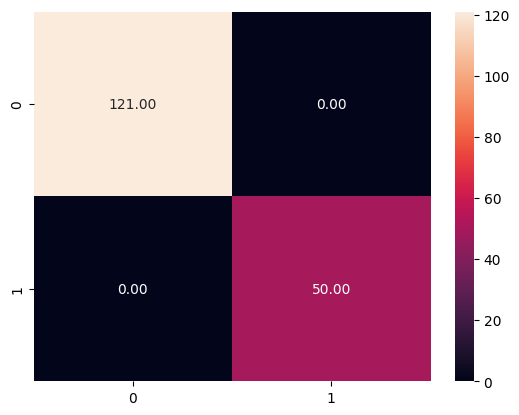

In [ ]:

gmodel = GradientBoostingClassifier()
gmodel.fit(X_train,y_train)
pred = gmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(gmodel.score)

**RANDOM** **FOREST** **CLASSIFIER**


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       121
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

<bound method ClassifierMixin.score of RandomForestClassifier()>


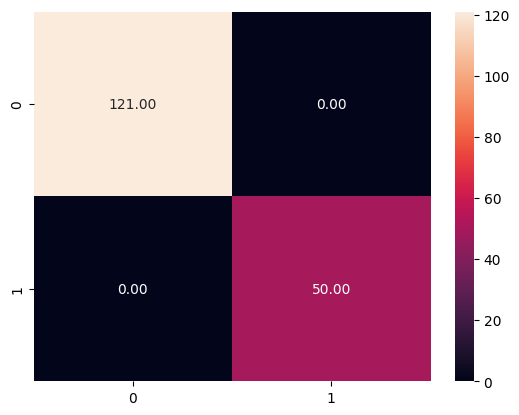

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
rmodel = RandomForestClassifier()
rmodel.fit(X_train,y_train)
pred = rmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(rmodel.score)


**PICKING** **THE** **FINAL** **MODEL**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       121
         1.0       1.00      0.96      0.98        50

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

<bound method ClassifierMixin.score of LogisticRegression()>


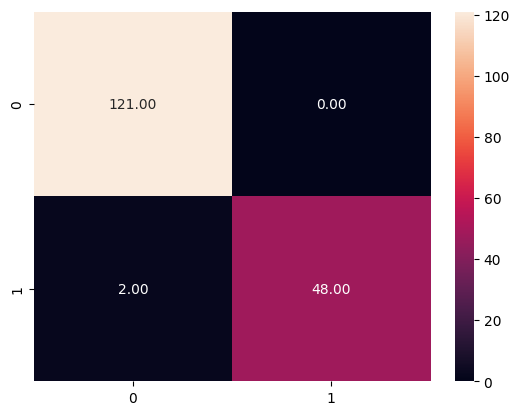

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(model.score)


**SAVING** **THE** **MODEL**

In [ ]:
import pickle  # Pickle is a library that helps us to save model
with open('ckd_prediction.pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
with open('ckd_prediction.pkl' , 'rb') as f: # Loading the model
    fmodel = pickle.load(f) # fmodel is the loaded model

In [ ]:
fmodel.predict(X_test) # Running prediction on test set using the loaded model

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0.])

In [ ]:
# ignoring scikit learn warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Running prediction on a single patient data using the loaded model
fmodel.predict([[48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0.0,0,1,1]])

array([1.])

In [ ]:
# Running prediction on a single patient data using the loaded model
fmodel.predict([[59.0,70.0,1.025,0.0,0.0,0,0,0,0,130.0,39.0,0.7,147.0,4.7,13.5,46,6700,4.5,0,0,0.0,1,0,0]])

array([0.])

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widgets
age_widget = widgets.IntSlider(description='Age:', min=0, max=120, value=30)
bp_widget = widgets.IntSlider(description='Blood Pressure:', min=0, max=200, value=120)
sg_widget = widgets.FloatSlider(description='Specific Gravity:', min=1.0, max=1.1, step=0.01, value=1.005)
al_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Albumin:')
su_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Sugar:')
# Define other widgets similarly...

# Define a button widget
button = widgets.Button(description='Predict')

# Define an output widget to display results or messages
output = widgets.Output()

# Function to handle button click
def on_button_click(button):
    with output:
        clear_output()  # Clear previous output
        # Perform some action here based on widget values
        # Example: Calculate something using widget values and display result
        age = age_widget.value
        bp = bp_widget.value
        sg = sg_widget.value
        al = al_widget.value
        su = su_widget.value
        # Use other widget values similarly...

        # Example: Print values
        print(f"Age: {age}, BP: {bp}, SG: {sg}, Albumin: {al}, Sugar: {su}")

# Link button click event to button click handler
button.on_click(on_button_click)

# Display widgets and button
display(age_widget, bp_widget, sg_widget, al_widget, su_widget, button, output)


IntSlider(value=30, description='Age:', max=120)

IntSlider(value=120, description='Blood Pressure:', max=200)

FloatSlider(value=1.005, description='Specific Gravity:', max=1.1, min=1.0, step=0.01)

Dropdown(description='Albumin:', options=('0', '1', '2', '3', '4', '5'), value='0')

Dropdown(description='Sugar:', options=('0', '1', '2', '3', '4', '5'), value='0')

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib
import os

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Specify the file path to save the model
model_file_path = '/content/ckd_prediction.pkl.joblib'  # Update this path as needed

# Save the trained model to the specified file path
joblib.dump(model, model_file_path)

# Verify the saved model file
print("Model saved successfully.")
print("Files in current directory:", os.listdir('/content'))


Model saved successfully.
Files in current directory: ['.config', 'ckd_prediction.pkl.joblib', 'kidney_disease_test.csv', 'kidney_merged.csv', 'ckd_prediction.pkl', 'kidney_clean.csv', 'kidney_disease.csv', 'Set03.csv', 'sample_data']


In [ ]:
su_widgest = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Sugar:')
from google.colab import output
import ipywidgets as widgets

# Define widgets
age_widget = widgets.IntSlider(description='Age:', min=0, max=120, value=30)
bp_widget = widgets.IntSlider(description='Blood Pressure:', min=0, max=200, value=120)
sg_widget = widgets.FloatSlider(description='Specific Gravity:', min=1.0, max=1.1, step=0.01, value=1.005)
al_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Albumin:')

# Define a button widget
button = widgets.Button(description='Predict')

# Define an output widget to display results or messages
output_widget = widgets.Output()

# Function to handle button click
def on_button_click(button):
    with output_widget:
        output_widget.clear_output()  # Clear previous output
        # Get the current values of widgets
        age = age_widget.value
        bp = bp_widget.value
        sg = sg_widget.value
        al = al_widget.value
        su = su_widget.value

        # Perform prediction (example)
        if age > 50:
            prediction_result = "CKD Positive"
        else:
            prediction_result = "CKD Negative"

        # Display prediction result
        print(f"Prediction Result: {prediction_result}")

# Link button click event to button click handler
button.on_click(on_button_click)

# Display widgets and button
display(age_widget, bp_widget, sg_widget, al_widget, su_widget, button, output_widget)


IntSlider(value=30, description='Age:', max=120)

IntSlider(value=120, description='Blood Pressure:', max=200)

FloatSlider(value=1.005, description='Specific Gravity:', max=1.1, min=1.0, step=0.01)

Dropdown(description='Albumin:', options=('0', '1', '2', '3', '4', '5'), value='0')

Dropdown(description='Sugar:', options=('0', '1', '2', '3', '4', '5'), value='0')

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
from google.colab import output
import ipywidgets as widgets

# Define widgets
age_widget = widgets.IntSlider(description='Age:', min=0, max=120, value=30)
bp_widget = widgets.IntSlider(description='Blood Pressure:', min=0, max=200, value=120)
sg_widget = widgets.FloatSlider(description='Specific Gravity:', min=1.0, max=1.1, step=0.01, value=1.005)
al_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Albumin:')
su_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Sugar:')

# Define a button widget
button = widgets.Button(description='Predict')

# Define an output widget to display results or messages
output_widget = widgets.Output()

# Function to handle button click
def on_button_click(button):
    with output_widget:
        output_widget.clear_output()  # Clear previous output
        # Get the current values of widgets
        age = age_widget.value
        bp = bp_widget.value
        sg = sg_widget.value
        al = al_widget.value
        su = su_widget.value

        # Perform prediction (example)
        if age > 50:
            prediction_result = "CKD Positive"
        else:
            prediction_result = "CKD Negative"

        # Display prediction result
        print(f"Prediction Result: {prediction_result}")

# Link button click event to button click handler
button.on_click(on_button_click)

# Display widgets and button
display(age_widget, bp_widget, sg_widget, al_widget, su_widget, button, output_widget)


IntSlider(value=30, description='Age:', max=120)

IntSlider(value=120, description='Blood Pressure:', max=200)

FloatSlider(value=1.005, description='Specific Gravity:', max=1.1, min=1.0, step=0.01)

Dropdown(description='Albumin:', options=('0', '1', '2', '3', '4', '5'), value='0')

Dropdown(description='Sugar:', options=('0', '1', '2', '3', '4', '5'), value='0')

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
if result == 0:
        with output:
            print("CKD Negative")
    else:
        with output:
            print("CKD Positive")


# Define widgets
age_widget = widgets.IntSlider(description='Age:', min=0, max=120, value=30)
bp_widget = widgets.IntSlider(description='Blood Pressure:', min=0, max=200, value=120)
sg_widget = widgets.FloatSlider(description='Specific Gravity:', min=1.0, max=1.1, step=0.01, value=1.005)
al_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Albumin:')
su_widget = widgets.Dropdown(options=['0', '1', '2', '3', '4', '5'], description='Sugar:')
# Define other widgets similarly...

# Define a button widget
button = widgets.Button(description='Predict')

# Define an output widget to display results or messages
output = widgets.Output()

# Function to handle button click
def on_button_click(button):
    with output:
        clear_output()  # Clear previous output
        # Perform some action here based on widget values
        # Example: Calculate something using widget values and display result
        age = age_widget.value
        bp = bp_widget.value
        sg = sg_widget.value
        al = al_widget.value
        su = su_widget.value
        # Use other widget values similarly...

        # Example: Print values
        print(f"Age: {age}, BP: {bp}, SG: {sg}, Albumin: {al}, Sugar: {su}")

# Link button click event to button click handler
button.on_click(on_button_click)

# Display widgets and button
display(age_widget, bp_widget, sg_widget, al_widget, su_widget, button, output)


IntSlider(value=30, description='Age:', max=120)

IntSlider(value=120, description='Blood Pressure:', max=200)

FloatSlider(value=1.005, description='Specific Gravity:', max=1.1, min=1.0, step=0.01)

Dropdown(description='Albumin:', options=('0', '1', '2', '3', '4', '5'), value='0')

Dropdown(description='Sugar:', options=('0', '1', '2', '3', '4', '5'), value='0')

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate
